In [1]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow==2.12.0rc0 tensorflow-io==0.29.0 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
np.random.seed(0)
# from sklearn.metrics import precision_score,recall_score,f1_score
import tensorflow as tf
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv("Downloads\Project1\labelled_testing_data.csv")
print("Total missing values : ",sum(list(data.isna().sum())))
data

Total missing values :  0


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,129.050634,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,socket,"[140159195621643, 140159192455417, 94656731598...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,129.051238,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,socket,"[139853228042507, 93935071185801, 93935080775184]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,129.051434,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,security_file_open,"[140362867191588, 8103505641674583858]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
3,129.051481,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,openat,[],4,17,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
4,129.051522,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,fstat,[140362867189385],2,0,"[{'name': 'fd', 'type': 'int', 'value': 17}, {...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188962,496.629003,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"[{'name': 'sockfd', 'type': 'int', 'value': 42...",1,1
188963,496.629025,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"[{'name': 'sockfd', 'type': 'int', 'value': 42...",1,1
188964,496.629047,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"[{'name': 'sockfd', 'type': 'int', 'value': 42...",1,1
188965,496.629069,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"[{'name': 'sockfd', 'type': 'int', 'value': 42...",1,1


In [6]:
classes, count = np.unique(data['eventName'], return_counts=True)

# Perform Label Encoding on the 'eventName' column
lbl_enc = LabelEncoder()
data['eventName_encoded'] = lbl_enc.fit_transform(data['eventName'])

# Replace special characters '?' and 'S' with NaN, then drop NaN rows
data.replace({'?': np.NaN, 'S': np.NaN}, inplace=True)
print("Total missing values: ", sum(list(data.isna().sum())))

# Drop rows with any NaN values
data.dropna(inplace=True)

# Convert all columns to numeric if possible
for c in data.columns:
    try:
        data[c] = pd.to_numeric(data[c])
    except ValueError:
        pass  # Ignore columns that cannot be converted

# Display the cleaned data
data

Total missing values:  0


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil,eventName_encoded
0,129.050634,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,socket,"[140159195621643, 140159192455417, 94656731598...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0,40
1,129.051238,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,socket,"[139853228042507, 93935071185801, 93935080775184]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0,40
2,129.051434,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,security_file_open,"[140362867191588, 8103505641674583858]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0,32
3,129.051481,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,openat,[],4,17,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0,28
4,129.051522,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,fstat,[140362867189385],2,0,"[{'name': 'fd', 'type': 'int', 'value': 17}, {...",0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188962,496.629003,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"[{'name': 'sockfd', 'type': 'int', 'value': 42...",1,1,9
188963,496.629025,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"[{'name': 'sockfd', 'type': 'int', 'value': 42...",1,1,9
188964,496.629047,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"[{'name': 'sockfd', 'type': 'int', 'value': 42...",1,1,9
188965,496.629069,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"[{'name': 'sockfd', 'type': 'int', 'value': 42...",1,1,9


In [7]:
print("Total Features : ",len(data.columns)-1)

Total Features :  16


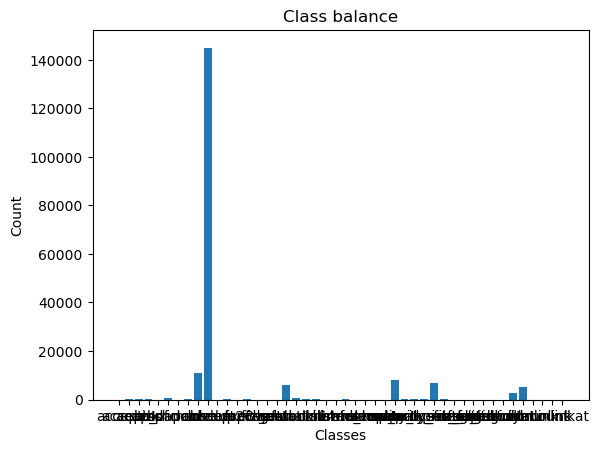

In [8]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [9]:
from sklearn.utils import resample
# Separate features and labels
X = data.drop("eventName", axis=1)
y = data["eventName"]

# Count the occurrences of each class
class_counts = y.value_counts()

# Calculate the majority and minority class labels
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Separate majority and minority class samples
majority_samples = data[data["eventName"] == majority_class]
minority_samples = data[data["eventName"] == minority_class]

# Oversample the minority class to match the majority class
minority_oversampled = resample(minority_samples,
                                 replace=True,      # Sample with replacement
                                 n_samples=len(majority_samples),  # Match majority class
                                 random_state=0)    # Set random seed for reproducibility
# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([majority_samples, minority_oversampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=0)

# Now, balanced_data contains the balanced dataset with equal instances of both classes


In [10]:
# Count the occurrences of each class in the balanced dataset
balanced_class_counts = balanced_data["eventName"].value_counts()

# Print the class counts
print(balanced_class_counts)

eventName
connect    144981
umount     144981
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y = train_test_split(data[data.columns[:len(data.columns)-1]].to_numpy(),
                                                 data[data.columns[-1]].to_numpy(),
                                                  test_size = 0.2,
                                                  shuffle=True)

In [12]:
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  151173
Train labels size :  151173
Test features size :  37794
Test features size :  37794


In [13]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (151173, 16)
Train labels :  (151173,)
Test Features :  (37794, 16)
Test labels :  (37794,)


In [14]:
train_y = train_y.reshape((-1,1))
test_y = test_y.reshape((-1,1))

In [15]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (151173, 16)
Train labels :  (151173, 1)
Test Features :  (37794, 16)
Test labels :  (37794, 1)


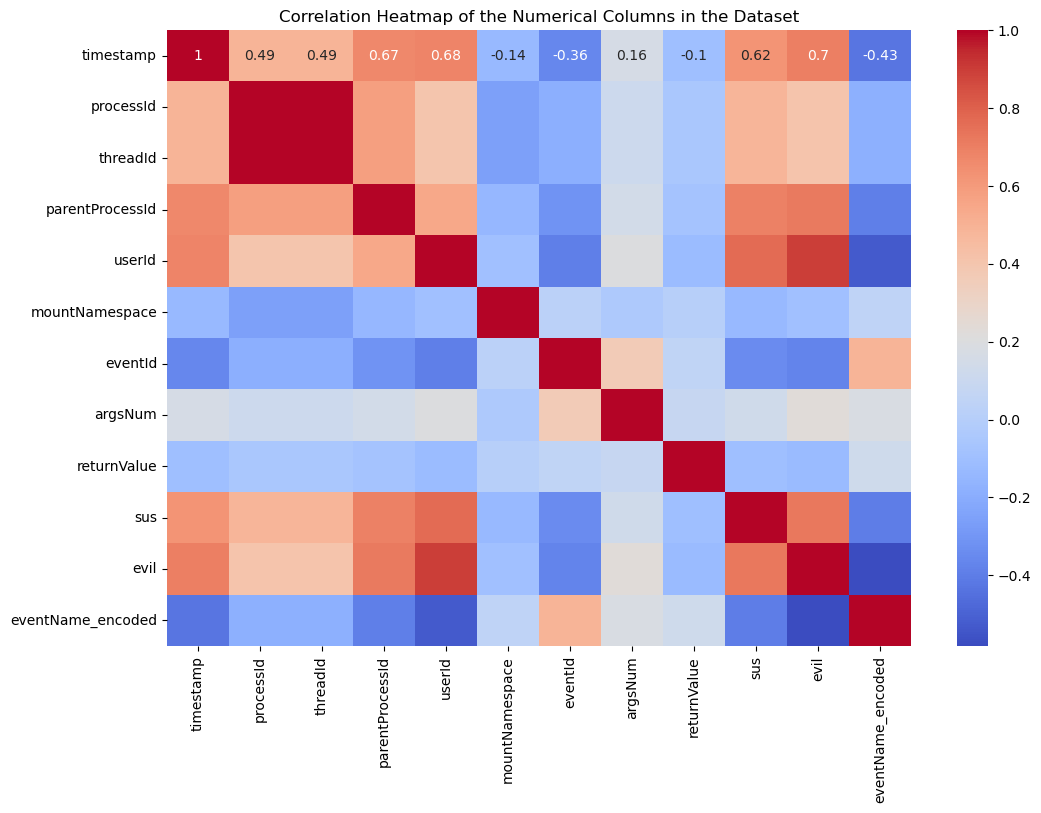

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataset for only numerical columns
numeric_data = data.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")  # Set annot=True if you want to see the correlation values
plt.title("Correlation Heatmap of the Numerical Columns in the Dataset")
plt.show()

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [120]:
# Assuming 'eventName_encoded' is the target column (you can change this to the correct target)
target_column = 'eventName_encoded'

# Ensure the target column exists (you should have already encoded it using LabelEncoder)
if target_column not in data.columns:
    from sklearn.preprocessing import LabelEncoder
    lbl_enc = LabelEncoder()
    data[target_column] = lbl_enc.fit_transform(data['eventName'])

# Select features (independent variables)
X = data.select_dtypes(include=[np.number]).drop(columns=[target_column])

# Select target (dependent variable)
y = data[target_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [122]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [124]:

# Optionally, you can evaluate the model (e.g., accuracy)
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [135]:
X = data.iloc[:, :-1] # Features
y = data.iloc[:, -1]


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [139]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [144]:
# Make predictions
y_pred = clf.predict(X_test)

In [146]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9999735407736677


In [150]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
X = data.iloc[:, :-1] # Features
y = data.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report for precision, recall, and F1 score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Optionally, you can extract individual metrics if needed
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' or 'macro' depending on your needs
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9999735407736677
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        11
           5       1.00      1.00      1.00       152
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00        67
           8       1.00      1.00      1.00      2142
           9       1.00      1.00      1.00     28979
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00        40
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          17       1.00      1.00      1.00      1215
          18       1.00      1.00      1.00       127
          19       1.00      

C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_cla